<a href="https://colab.research.google.com/github/wnyngj/class2022spring/blob/main/image_prorcessing0406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing
https://www.w3schools.com/html/html_colors_rgb.asp

배울 것(숙지해야할 것)
1. 이미지 라이브러리 쓰는 법
2. 이미지라는 것은 RGB 3층짜리 array이다
3. 정수 0~255 를 바꿔주면 이미지가 바뀌더라

rgb(255,255,255) >>>(50,50,50)>>>진한 회색

gray(n,n,n)

안배워-RGBA(r,g,b,알파-투명도0~1)

In [2]:
import cv2 # openCV (computer vision) package 의 라이브러리인 cv2
#원래 cv2.imshow()인데 crash가 자주 나서 google에서 만든 대체재 쓸 것임
from google.colab.patches import cv2_imshow # substitution for cv2.imshow
import matplotlib.pylab as plt

OpenCV imread, imwrite and imshow indeed all work with the BGR order, so there is no need to change the order when you read an image with cv2.imread and then want to show it with cv2.imshow. While BGR is used consistently throughout OpenCV, most other image processing libraries use the RGB ordering. If you want to use matplotlib's imshow but read the image with OpenCV, you would need to convert from BGR to RGB.

## download/save an image from Urls

어떤 url에 있는 사진을 내 컴퓨터로 불러오고 싶다

os.system("curl^" + url주소 + "^>^파일이름.jpg")

In [4]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/tiger.jpg"
os.system("curl " + url + " > test.jpg")

0

## display image

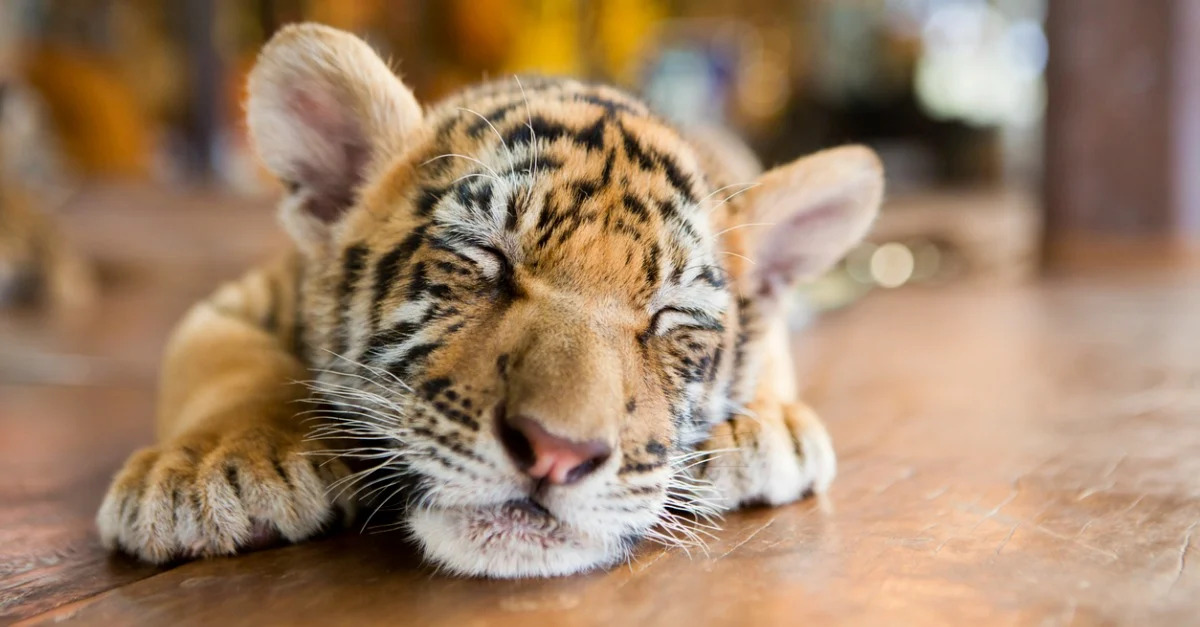

In [5]:
image_bgr = cv2.imread('test.jpg')    #cv2.imread함수: 사진의 rgb 숫자들의 행렬
cv2_imshow(image_bgr) #3d 숫자 행렬을 이미지로 display하라

## display B, G, R channel

In [ ]:
image_bgr
#숫자의 의미는?

array([[[109, 123, 141],
        [108, 122, 140],
        [105, 120, 136],
        ...,
        [139, 133, 152],
        [139, 133, 152],
        [139, 133, 152]],

       [[109, 123, 141],
        [108, 122, 140],
        [106, 121, 137],
        ...,
        [139, 133, 152],
        [139, 133, 152],
        [139, 133, 152]],

       [[110, 124, 142],
        [109, 123, 141],
        [106, 121, 137],
        ...,
        [140, 134, 153],
        [139, 133, 152],
        [139, 133, 152]],

       ...,

       [[ 71,  93, 129],
        [ 73,  92, 129],
        [ 74,  94, 129],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]],

       [[ 72,  94, 130],
        [ 73,  92, 129],
        [ 73,  93, 128],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]],

       [[ 72,  94, 130],
        [ 74,  93, 130],
        [ 74,  94, 129],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]]

In [ ]:
print(type(image_bgr)); print(image_bgr.shape)
#넘피엔디어레이
#세로 627,1d 2d 3d 가로 1200
#Q. image bgr에 담겨있는 숫자의 총 개수는 ? 627*1200*3
#Q. red는 몇개의 숫자가 있나? 627*1200

<class 'numpy.ndarray'>
(627, 1200, 3)


사진 편집하기

In [ ]:
image_b = image_bgr.copy()  
#ndarray에선 image_b = image.bgr하면 두개 같아지므로 
#편집하면 같이 바뀜. 그니까 copy 한다음에 하기
image_b[:,:,[1,2]] = 0  #3째 list에서 두번째 column과 3번째 column, 즉 G,R 을 =0 으로
#image_b[:,:,:] 전부 다
#g와 r을 0으로 바꿈, b만 있는 것

In [ ]:
cv2_imshow(image_b)   #퍼런 호랑이

In [ ]:
image_g = image_bgr.copy()
image_g[:,:,[0,2]] = 0
cv2_imshow(image_g)
#br을 0,g만 남음

In [ ]:
image_r = image_bgr.copy()
image_r[:,:,[0,1]] = 0
cv2_imshow(image_r)
#bg를 0, r만 남음

In [ ]:
image_inverse = 255 - image_bgr   #반전
cv2_imshow(image_inverse)

##histograms

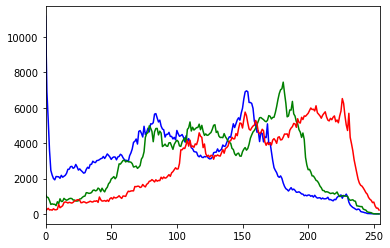

In [6]:
# Display the histogram of R, G, B channel
color = ['b','g','r']
for i in range(len(color)): #range(3) -> 인덱스 3개 0,1,2
    histr = cv2.calcHist([image_bgr],[i],None,[255],[0,255]) 
    #cv2.calcHist: 히스토그램에서 각각의 bin에 RGB얼마씩 들어있는지 세주는 함수
    # ([image], [nChannel아까 인덱스 0,1,2], mask, [histSize], [range])
    plt.plot(histr, color = color[i])
    plt.xlim([0,255])   #그래프에서 x쪽 limit을 255까지 되게 그려라

[627,1200,3] 각각의 데이터 3개씩 모여있던 것을 BGR 안따지고 하나하나씩 떼어보기

In [ ]:
# Display the histogram of all the pixels in the color image
plt.hist(image_bgr.ravel(), bins = 256, range = [0,256]) 
plt.show()
#오른쪽으로 갈수록 수치가 높아지면 이 사진이 밝겠구나 예측할 수 있음
#=RGB구분 없이 하나하나 데이터 떨어뜨린 것이니까 255에 가까워질수록 R,G,B 모두 다 높구나

## gray transformation

In [ ]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
#cv2.cvtColor(오리지널 파일 이름, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
#cv2_imshow(255-image_gray) 반전되는 흑백그림